In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import random

In [2]:
dataset = pd.read_csv('wikigraph_reduced.csv', sep='\t', 
                      delimiter=None, header='infer',
                      names=None, index_col=None, 
                      usecols=None, 
                      encoding = "ISO-8859-1")
dataset.head()

,Unnamed: 0,0,1
0,796,95,1185516
1,909,108,1059989
2,910,108,1062426
3,911,108,1161925
4,1141,134,541222


In [3]:
dataset.columns=['Index','Source','Target']

In [4]:
# check if index columns has unique values
print(len(dataset.Index))
print(len(set(dataset.Index)))

483094
483094


In [5]:
dataset.set_index('Index' , inplace = True)
dataset.head()

,Source,Target
Index,,
796,95,1185516
909,108,1059989
910,108,1062426
911,108,1161925
1141,134,541222


#### Associate single category to each node

In [8]:
# all nodes in and out
unique_nodes = set(set(dataset.Source).union(set(dataset.Target)))
n_nodes = len(unique_nodes)
n_edges = len(dataset)

In [37]:
n_nodes

98343

In [25]:
category_file = 'wiki-topcats-categories.txt'

In [26]:
categories = {v: [] for v in unique_nodes}
lost = []
with open(category_file) as file:
    for i in range(17364):
        line = file.readline()
        category = line.split(';')[0].split(':')[-1]
        nodes = line.split(';')[1].split(' ')[1:-2]
        for node in nodes:
            try:
                categories[int(node)].append(category)
            except:
                lost.append(int(node))

In [27]:
categories_filtered = {}
for n in categories.keys():
    try:
        rand_category = random.choice(categories[n])
        categories_filtered[n] = rand_category
    except:
        categories_filtered[n] = None

#### Create graph

In [28]:
in_links = {v: [] for v in set(dataset.Source)}
out_links = {v: [] for v in set(dataset.Target)}

for row in dataset.iterrows():
    source = row[1][0]
    target = row[1][1]
    in_links[source].append(target)
    out_links[target].append(source)

In [33]:
links = in_links.copy()

In [34]:
links.update(out_links)

In [36]:
len(links)

98343

In [29]:
n_art_outlink = len(out_links)
n_art_inlink = len(in_links)

In [30]:
connections = []
for node in nodes:
    try:
        in_deg = len(in_links[node])
    except:
        in_deg = 0
    try:
        out_deg = len(out_links[node])
    except:
        out_deg = 0
    connections.append(in_deg+out_deg)

#### Check if directed

In [44]:
directed = False
for node in in_links:
    if len(set(in_links[node]).intersection(set(out_links[node]))) != 0:
        directed = True
        break
if directed:
    print('Graph is directed')
else:
    print('Graph is undirected')

Graph is directed


#### Density

In [45]:
density = (n_edges/(n_nodes*(n_nodes-1)))

In [47]:
n_edges/n_nodes

4.912337431235573

In [46]:
density

4.9951571365597335e-05

#### Visualize the nodes' degree distribution

In [49]:
my_len = [] 
for node in links.keys():
    my_len.append(len(links[node]))

In [50]:
my_len

[3,
 1,
 1,
 2,
 4,
 1,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 7,
 1,
 1,
 16,
 140,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 5,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 34,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 2,
 3,
 1,
 15,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 11,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 4,
 2,
 1,
 5,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 22,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 7,
 1,
 2,
 5,
 1,
 1,
 4,
 1,
 4,
 3,
 1,
 5,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 15,
 1,
 1,
 5,
 1,
 3,
 8,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 17,
 1,
 4,
 3,
 1,
 1,
 1,
 4,
 2,
 2,
 2,
 1,
 1,
 1,
 1

In [51]:
node_degree = dict(zip(links.keys(), my_len))
node_degree

{786432: 3,
 786433: 1,
 786434: 1,
 786435: 2,
 786436: 4,
 786437: 1,
 786438: 12,
 786439: 1,
 786440: 1,
 786441: 1,
 786442: 1,
 786443: 1,
 786444: 1,
 786445: 2,
 786446: 1,
 786447: 1,
 786448: 6,
 786449: 1,
 786450: 4,
 786451: 1,
 786452: 1,
 786453: 1,
 786454: 2,
 786455: 1,
 786456: 1,
 786457: 2,
 786458: 1,
 786459: 1,
 786460: 1,
 786461: 1,
 786462: 1,
 786463: 1,
 786464: 4,
 786465: 1,
 786466: 1,
 786467: 2,
 786468: 1,
 786469: 1,
 786470: 7,
 786471: 1,
 786472: 1,
 786473: 16,
 786474: 140,
 786475: 1,
 786476: 3,
 786477: 1,
 786478: 1,
 786479: 1,
 786480: 2,
 786481: 1,
 786482: 1,
 786483: 1,
 786484: 1,
 786485: 1,
 786486: 1,
 786487: 1,
 786488: 1,
 786489: 1,
 786490: 1,
 786491: 1,
 786492: 1,
 786493: 1,
 786494: 1,
 786495: 1,
 786496: 1,
 786497: 1,
 786498: 2,
 786499: 2,
 786500: 1,
 786501: 1,
 786502: 1,
 786503: 5,
 786504: 1,
 786505: 3,
 786506: 1,
 786507: 1,
 786508: 1,
 786509: 1,
 786510: 1,
 786511: 1,
 786512: 1,
 786513: 34,
 786514: 1,

In [52]:
sorted(my_len)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [53]:
from collections import Counter 

In [54]:
d = Counter(node_degree)

In [56]:
max(my_len)

10815

In [64]:
counter = [0]
counter_supp = list()

In [65]:
for i in range(1, max(my_len)):
    counter_supp.append(my_len.count(i))

In [66]:
for i in range(1, max(my_len)):
    counter.append(counter[-1]+my_len.count(i))

In [62]:
counter

[0,
 43624,
 57848,
 66373,
 72352,
 76695,
 80019,
 82582,
 84693,
 86378,
 87750,
 88864,
 89853,
 90661,
 91380,
 91979,
 92476,
 92960,
 93351,
 93711,
 94045,
 94329,
 94610,
 94829,
 95045,
 95239,
 95414,
 95594,
 95749,
 95868,
 96003,
 96128,
 96229,
 96320,
 96410,
 96513,
 96608,
 96680,
 96750,
 96829,
 96897,
 96944,
 96998,
 97056,
 97095,
 97143,
 97189,
 97229,
 97270,
 97313,
 97357,
 97392,
 97419,
 97457,
 97492,
 97529,
 97544,
 97571,
 97603,
 97626,
 97646,
 97667,
 97686,
 97709,
 97733,
 97748,
 97756,
 97776,
 97797,
 97813,
 97821,
 97834,
 97839,
 97854,
 97868,
 97880,
 97887,
 97902,
 97912,
 97918,
 97931,
 97943,
 97954,
 97965,
 97970,
 97982,
 97988,
 98001,
 98010,
 98019,
 98027,
 98030,
 98041,
 98049,
 98056,
 98063,
 98068,
 98077,
 98079,
 98084,
 98088,
 98095,
 98103,
 98107,
 98115,
 98121,
 98126,
 98128,
 98131,
 98138,
 98143,
 98149,
 98153,
 98155,
 98158,
 98160,
 98166,
 98170,
 98173,
 98177,
 98186,
 98190,
 98192,
 98195,
 98198,
 981

In [67]:
counter_supp

[43624,
 14224,
 8525,
 5979,
 4343,
 3324,
 2563,
 2111,
 1685,
 1372,
 1114,
 989,
 808,
 719,
 599,
 497,
 484,
 391,
 360,
 334,
 284,
 281,
 219,
 216,
 194,
 175,
 180,
 155,
 119,
 135,
 125,
 101,
 91,
 90,
 103,
 95,
 72,
 70,
 79,
 68,
 47,
 54,
 58,
 39,
 48,
 46,
 40,
 41,
 43,
 44,
 35,
 27,
 38,
 35,
 37,
 15,
 27,
 32,
 23,
 20,
 21,
 19,
 23,
 24,
 15,
 8,
 20,
 21,
 16,
 8,
 13,
 5,
 15,
 14,
 12,
 7,
 15,
 10,
 6,
 13,
 12,
 11,
 11,
 5,
 12,
 6,
 13,
 9,
 9,
 8,
 3,
 11,
 8,
 7,
 7,
 5,
 9,
 2,
 5,
 4,
 7,
 8,
 4,
 8,
 6,
 5,
 2,
 3,
 7,
 5,
 6,
 4,
 2,
 3,
 2,
 6,
 4,
 3,
 4,
 9,
 4,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 7,
 0,
 0,
 1,
 1,
 4,
 6,
 1,
 3,
 2,
 1,
 1,
 3,
 0,
 2,
 3,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 3,
 1,
 5,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 3,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 

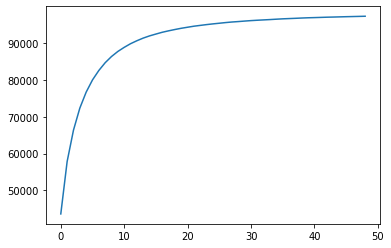

In [72]:
plt.plot(counter[1:50]);